## 0. Install and Import Dependencies

In [ ]:
!pip install easyocr --quiet
!pip install imutils --quiet
!pip uninstall opencv-python-headless==4.5.5.62
!pip install opencv-python-headless==4.5.2.52


     |████████████████████████████████| 2.9 MB 15.3 MB/s 
     |████████████████████████████████| 145 kB 59.1 MB/s 
     |████████████████████████████████| 47.6 MB 1.6 MB/s 
     |████████████████████████████████| 619 kB 66.0 MB/s 
Found existing installation: opencv-python-headless 4.5.4.60
Uninstalling opencv-python-headless-4.5.4.60:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/cv2/*
    /usr/local/lib/python3.8/dist-packages/opencv_python_headless-4.5.4.60.dist-info/*
    /usr/local/lib/python3.8/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.8/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.8/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.8/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.8/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    

In [ ]:
import cv2
print(cv2.__version__)
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

4.5.2


## 1. Read in Image, Grayscale and Blur

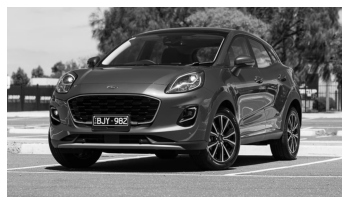

In [ ]:
#read image from vehicle detection 
img = cv2.imread('/content/image3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()


## 2. Apply filter and find edges for localization

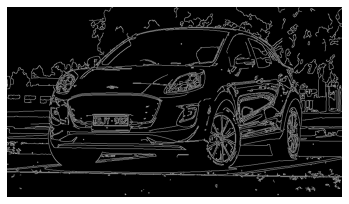

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

## 3. Find Contours and Apply Mask

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[263, 334]],

       [[264, 363]],

       [[369, 362]],

       [[366, 333]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

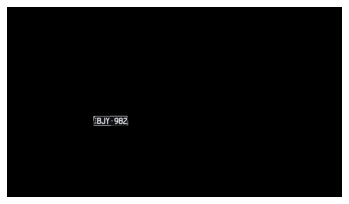

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

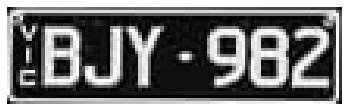

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

## 4. Use Easy OCR To Read Text

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[0, 2], [107, 2], [107, 31], [0, 31]], 'EBJY. 982]', 0.3741937983327902)]

# Use Tesseract OCR to 

## 5. Render Result

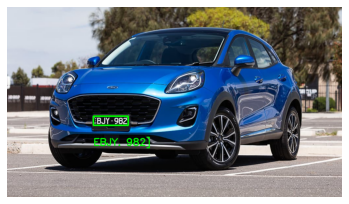

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

#Try creating new image and send this output to server

In [ ]:
print(result[0][-2])

EBJY. 982]


In [ ]:
print(result)

[([[0, 2], [107, 2], [107, 31], [0, 31]], 'EBJY. 982]', 0.3741937983327902)]
